In [1]:
from rdkit import Chem

import os,sys,inspect
sys.path.insert(0,'/home/icarus/T-CVAE-MolGen/src') 

RDKit WARNING: [04:25:50] Enabling RDKit 2019.09.1 jupyter extensions


In [2]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
DrawingOptions.bondLineWidth=1.8

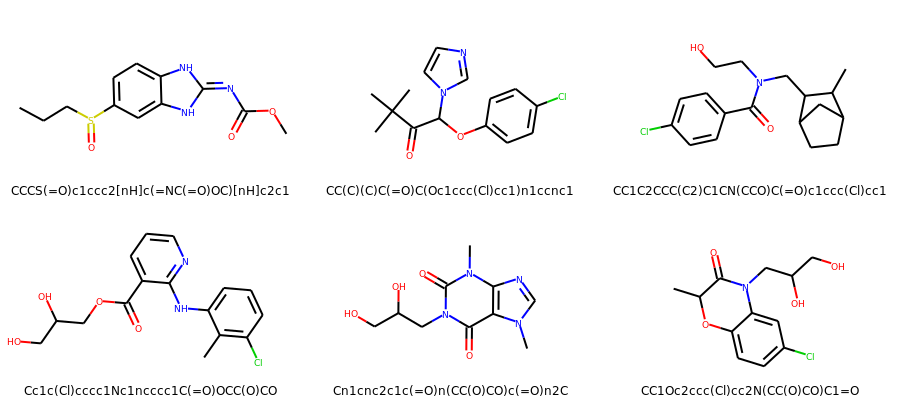

In [3]:
smiles = []
with open('data/01_raw/moses/dataset_v1.csv', 'r') as f:
    _ = f.readline()
    smiles = [f.readline().split(',')[0] for _ in range(120)]
    f.close()

mols = [Chem.MolFromSmiles(smile) for smile in smiles]
Draw.MolsToGridImage(mols[0:6],molsPerRow=3,subImgSize=(300,200),legends=smiles)

In [4]:
from structures import Vocab

In [5]:
vocab = Vocab(smiles)
vocab.slots[0]

[('C', 0, 3),
 ('C', 0, 2),
 ('C', 0, 2),
 ('S', 0, 0),
 ('O', 0, 0),
 ('C', 0, 0),
 ('C', 0, 1),
 ('C', 0, 1),
 ('C', 0, 0),
 ('N', 0, 1),
 ('C', 0, 0),
 ('N', 0, 0),
 ('C', 0, 0),
 ('O', 0, 0),
 ('O', 0, 0),
 ('C', 0, 3),
 ('N', 0, 1),
 ('C', 0, 0),
 ('C', 0, 1)]

In [6]:
from structures.moltree import MolTree

RDKit ERROR: [04:26:07] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [04:26:07] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [04:26:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [04:26:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [04:26:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [04:26:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [04:26:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [04:26:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [04:26:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [04:26:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [04:26:07] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [04:26:07] Explicit valence for atom # 1 

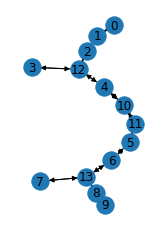

In [8]:
mt = MolTree(smiles[0])
mt = MolTree(mt.smiles3D)
mt.recover()
mt.assemble()

import networkx as nx
import matplotlib.pyplot as plt
plt.subplot(121)
nx.draw(mt.to_networkx(), with_labels=True)
plt.show()